<a href="https://colab.research.google.com/github/NataPo-39/FineTuning-general/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0___2___%22%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22PE_8_1_%22FineTuning_general_ipynb%22%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Скачиваем датасет с Kaggle, распаковываем архив

In [ ]:
# Установка Kaggle API (обязательно!)
!pip install -q kaggle  # -q для тихого режима (без лишнего вывода)

In [ ]:
# Добавляем в САМОМ НАЧАЛЕ блок импортов
import os
import json
from google.colab import files

In [ ]:
# Удаляем старые настройки если есть
!rm -rf ~/.kaggle

# Загружаем новый kaggle.json
uploaded = files.upload()  # Выберите ваш файл kaggle.json

# Проверяем содержимое файла (должен содержать username и key)
kaggle_creds = json.loads(next(iter(uploaded.values())).decode('utf-8'))
assert 'username' in kaggle_creds, "Файл kaggle.json не содержит username"
assert 'key' in kaggle_creds, "Файл kaggle.json не содержит key"

# Правильно размещаем файл
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
# Очищаем предыдущие попытки
#!rm -rf Rock-Paper-Scissors rock-paper-scissors-dataset.zip

# 3. Скачивание датасета
!kaggle datasets download -d sanikamal/rock-paper-scissors-dataset

# 4. Проверка скачивания
assert os.path.exists('rock-paper-scissors-dataset.zip'), "Архив не скачался!"

# 5. Распаковка
!unzip -q rock-paper-scissors-dataset.zip -d Rock-Paper-Scissors

# 6. Проверка структуры
print("\nСодержимое папки Rock-Paper-Scissors:")
!ls -la Rock-Paper-Scissors

Dataset URL: https://www.kaggle.com/datasets/sanikamal/rock-paper-scissors-dataset
License(s): other
 88% 400M/452M [00:00<00:00, 460MB/s]
100% 452M/452M [00:00<00:00, 484MB/s]

Содержимое папки Rock-Paper-Scissors:
total 16
drwxr-xr-x 4 root root 4096 Jun  5 20:16 .
drwxr-xr-x 1 root root 4096 Jun  5 20:16 ..
drwxr-xr-x 3 root root 4096 Jun  5 20:16 rock-paper-scissors
drwxr-xr-x 5 root root 4096 Jun  5 20:16 Rock-Paper-Scissors


In [ ]:
# Сравним содержимое папок
!diff -r Rock-Paper-Scissors Rock-Paper-Scissors-1 2>/dev/null || echo "Папки различаются"

Папки различаются


In [ ]:
# Или, если дубликат тоже называется Rock-Paper-Scissors (с пробелом/спецсимволом):
!rm -rf rock-paper-scissors\

эта часть кода не выполнялась - переписана, см. код ниже

In [ ]:
# Install Kaggle package
!pip install kaggle >> None

# Upload Kaggle API token (you need to have a kaggle.json file with your Kaggle API credentials)
from google.colab import files
files.upload()

# Create a Kaggle folder and move the kaggle.json file there
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json

# Download the Rock Paper Scissors dataset from Kaggle
!kaggle datasets download -d sanikamal/rock-paper-scissors-dataset

# Unzip the dataset
!unzip rock-paper-scissors-dataset.zip

KeyboardInterrupt: 

In [ ]:
import os
import shutil

# Основная директория (обратите внимание на двойной путь!)
data_dir = 'Rock-Paper-Scissors/Rock-Paper-Scissors'

# 1. Создаем папку val в той же структуре
val_dir = os.path.join(data_dir, 'val')
os.makedirs(val_dir, exist_ok=True)

# 2. Создаем подпапки классов
for class_name in ['rock', 'paper', 'scissors']:
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

# 3. Переносим файлы из validation
validation_dir = os.path.join(data_dir, 'validation')
for filename in os.listdir(validation_dir):
    # Определяем класс по имени файла (пример для файлов типа "rock1.png")
    if 'rock' in filename.lower():
        class_name = 'rock'
    elif 'paper' in filename.lower():
        class_name = 'paper'
    elif 'scissors' in filename.lower():
        class_name = 'scissors'
    else:
        continue  # Пропускаем неклассифицированные файлы

    src_path = os.path.join(validation_dir, filename)
    dst_path = os.path.join(val_dir, class_name, filename)

    # Переносим с проверкой
    if os.path.exists(src_path):
        shutil.move(src_path, dst_path)
        print(f"Перенесено: {filename} → {class_name}/")
    else:
        print(f"Ошибка: файл {src_path} не найден!")

# Проверка результата
print("\nИтоговое содержимое val:")
!ls -l {val_dir}/*

Перенесено: scissors7.png → scissors/
Перенесено: rock9.png → rock/
Перенесено: rock6.png → rock/
Перенесено: paper6.png → paper/
Перенесено: paper1.png → paper/
Перенесено: paper7.png → paper/
Перенесено: scissors9.png → scissors/
Перенесено: paper3.png → paper/
Перенесено: rock3.png → rock/
Перенесено: paper4.png → paper/
Перенесено: paper-hires1.png → paper/
Перенесено: rock5.png → rock/
Перенесено: scissors8.png → scissors/
Перенесено: paper2.png → paper/
Перенесено: rock1.png → rock/
Перенесено: paper9.png → paper/
Перенесено: rock-hires1.png → rock/
Перенесено: rock2.png → rock/
Перенесено: rock4.png → rock/
Перенесено: rock7.png → rock/
Перенесено: paper5.png → paper/
Перенесено: scissors1.png → scissors/
Перенесено: rock8.png → rock/
Перенесено: scissors5.png → scissors/
Перенесено: scissors-hires1.png → scissors/
Перенесено: paper8.png → paper/
Перенесено: paper-hires2.png → paper/
Перенесено: scissors2.png → scissors/
Перенесено: scissors3.png → scissors/
Перенесено: scissors

# Приводим данные к нужному формату, добавляем аугментации

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
import os
from torch.optim import lr_scheduler

# Define transformations (без изменений)
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([  # Изменил 'test' на 'val'
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Учитываем новую структуру папок
data_dir = 'Rock-Paper-Scissors/Rock-Paper-Scissors'  # <-- Важное изменение!

# Проверяем существование папок
assert os.path.exists(os.path.join(data_dir, 'train')), "Папка train не найдена"
assert os.path.exists(os.path.join(data_dir, 'val')), "Папка val не найдена"

# Создаем datasets (используем 'val' вместо 'test')
image_datasets = {
    'train': datasets.ImageFolder(os.path.join(data_dir, 'train'), data_transforms['train']),
    'val': datasets.ImageFolder(os.path.join(data_dir, 'val'), data_transforms['val'])
}

# DataLoaders
dataloaders = {
    'train': torch.utils.data.DataLoader(
        image_datasets['train'],
        batch_size=32,
        shuffle=True,
        num_workers=4
    ),
    'val': torch.utils.data.DataLoader(
        image_datasets['val'],
        batch_size=32,
        shuffle=False,  # Для валидации не перемешиваем!
        num_workers=4
    )
}

# Размеры датасетов
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

# Проверка
print(f"Классы: {class_names}")
print(f"Обучающих изображений: {dataset_sizes['train']}")
print(f"Валидационных изображений: {dataset_sizes['val']}")

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('\nУстройство для обучения:', device)

Классы: ['paper', 'rock', 'scissors']
Обучающих изображений: 2520
Валидационных изображений: 33

Устройство для обучения: cuda:0


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


# Визуализируем датасет

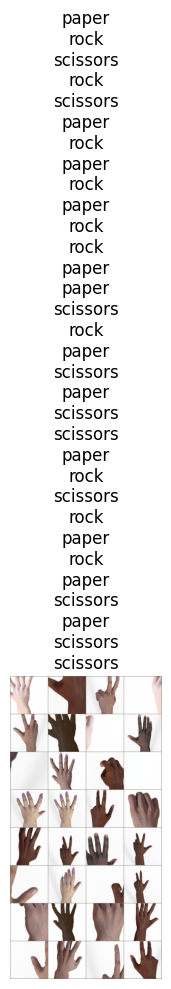

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

def imshow(inp, title=None, figsize=(10, 10)):
    """Улучшенная визуализация тензорных изображений с нормализацией."""
    # Конвертируем тензор в numpy array и меняем порядок осей (C, H, W) -> (H, W, C)
    inp = inp.numpy().transpose((1, 2, 0))

    # Обратная нормализация (используем те же параметры, что и в transforms)
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean

    # Обрезаем значения до допустимого диапазона [0, 1]
    inp = np.clip(inp, 0, 1)

    # Создаем график
    plt.figure(figsize=figsize)
    plt.imshow(inp)
    if title is not None:
        plt.title('\n'.join(title))  # Перенос длинных названий
    plt.axis('off')  # Убираем оси полностью
    plt.tight_layout()
    plt.show()

# Безопасное получение батча данных
try:
    inputs, classes = next(iter(dataloaders['train']))

    # Проверка наличия данных
    if inputs.shape[0] == 0:
        raise RuntimeError("Получен пустой батч данных!")

    # Создаем сетку изображений (4 колонки для лучшего отображения)
    out = torchvision.utils.make_grid(inputs, nrow=4, padding=2)

    # Получаем метки классов
    titles = [class_names[x] for x in classes]

    # Визуализируем
    imshow(out, title=titles)

except Exception as e:
    print(f"Ошибка при визуализации: {str(e)}")
    print("Проверьте:")
    print("1. Что dataloaders['train'] содержит данные")
    print("2. Что преобразования данных работают корректно")
    print(f"Текущий размер батча: {inputs.shape if 'inputs' in locals() else 'N/A'}")


# Прописываем общую функцию для обучения

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=5):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    # История для визуализации
    history = {
        'train_loss': [],
        'train_acc': [],
        'val_loss': [],
        'val_acc': []
    }

    for epoch in range(num_epochs):
        print(f'\nEpoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        for phase in ['train', 'val']:  # Изменил 'test' на 'val' для единообразия
            if phase == 'train':
                model.train()  # Режим обучения
                scheduler.step()  # Обновляем lr в начале эпохи
            else:
                model.eval()   # Режим оценки

            running_loss = 0.0
            running_corrects = 0

            # Итерация по данным с прогресс-баром
            for inputs, labels in tqdm(dataloaders[phase], desc=f'{phase} phase'):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                # Включаем градиенты только при обучении
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Обратное распространение + оптимизация только в фазе обучения
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Статистика
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            # Вычисляем средние значения по эпохе
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            # Сохраняем историю
            if phase == 'train':
                history['train_loss'].append(epoch_loss)
                history['train_acc'].append(epoch_acc.item())
            else:
                history['val_loss'].append(epoch_loss)
                history['val_acc'].append(epoch_acc.item())

            print(f'{phase.capitalize()} Loss: {epoch_loss:.4f} | Acc: {epoch_acc:.4f}')

            # Сохраняем лучшие веса модели
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                torch.save(model.state_dict(), 'best_model_weights.pth')
                print('New best model saved!')

    time_elapsed = time.time() - since
    print(f'\nTraining complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best Val Accuracy: {best_acc:.4f}')

    # Загружаем лучшие веса модели
    model.load_state_dict(best_model_wts)

    return model, history  # Возвращаем и модель, и историю

# Задаем две модели - с нуля и предобученную. У предобученной замораживаем веса, запускаем их обучение

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torch.optim import lr_scheduler

# 1. Модель с нуля (scratch)
model_ft_scratch = models.resnet18(pretrained=False)  # НЕ предобученная модель
num_ftrs = model_ft_scratch.fc.in_features

# Инициализация последнего слоя (лучшая практика)
model_ft_scratch.fc = nn.Sequential(
    nn.Dropout(0.5),  # Добавляем dropout для регуляризации
    nn.Linear(num_ftrs, len(class_names))
)
model_ft_scratch = model_ft_scratch.to(device)

# Инициализация весов (рекомендуется для моделей с нуля)
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            nn.init.zeros_(m.bias)
model_ft_scratch.apply(init_weights)

criterion = nn.CrossEntropyLoss()

# Оптимизатор с увеличенным learning rate для обучения с нуля
optimizer_ft_scratch = optim.SGD(
    model_ft_scratch.parameters(),
    lr=0.01,  # Больше lr для обучения с нуля
    momentum=0.9,
    weight_decay=1e-4  # Добавляем L2 регуляризацию
)

# Scheduler с более частым уменьшением lr
exp_lr_scheduler_scratch = lr_scheduler.StepLR(optimizer_ft_scratch, step_size=3, gamma=0.1)

# 2. Предобученная модель (fine-tuning)
model_ft_pretrained = models.resnet18(weights='IMAGENET1K_V1')

# Замораживаем все слои кроме последнего
for name, param in model_ft_pretrained.named_parameters():
    if 'fc' not in name:  # Размораживаем только последний слой
        param.requires_grad = False

# Более сложная головная часть для трансферного обучения
model_ft_pretrained.fc = nn.Sequential(
    nn.Linear(num_ftrs, 256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, len(class_names))
)
model_ft_pretrained = model_ft_pretrained.to(device)

# Оптимизатор только для последнего слоя
optimizer_ft_pretrained = optim.SGD(
    model_ft_pretrained.fc.parameters(),
    lr=0.001,  # Меньше lr для fine-tuning
    momentum=0.9
)

# Более плавное уменьшение lr
exp_lr_scheduler_pretrained = lr_scheduler.StepLR(optimizer_ft_pretrained, step_size=7, gamma=0.1)

# Проверка количества обучаемых параметров
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"Обучаемых параметров (scratch): {count_parameters(model_ft_scratch)}")
print(f"Обучаемых параметров (pretrained): {count_parameters(model_ft_pretrained)}")

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 119MB/s]


Обучаемых параметров (scratch): 11178051
Обучаемых параметров (pretrained): 132099


# Выводы

### Обучение с нуля:

Время: 1m23s

Best val Acc: 0.6559

### Дообучение:

Время: 1m16s

Best val Acc: 0.9274